## Task 01: 
Use the Multi Segment Simpsons 1/3 rule for finding Integral of the following function within the closed interval of $[0,1]$ and Plot the Relative Absolute Error for the different number of segments. The the integrad is as follows: 
$$ f(x) = 15\sqrt{x^{3}} + 8\sqrt[\leftroot{-1}\uproot{2}\scriptstyle 3]{x^{2}} + x $$


In [132]:
from sympy import sympify, symbols, integrate
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 

x = symbols('x')
# original simpsons 1/3 method
def simpsons_one_third(f= None, a = 0, b = 0):
    h = (b-a)/2. 
    return h/3.*(f.subs(x,a)+ 4*f.subs(x, (a+b)/2.) + f.subs(x, b))

# multisegment simpsons 1/3 method
def multi_segment_simpsons_one_third(f, a=0, b=0, n=0, verbose = False):
    x_vals = np.linspace(start=0, stop = 1, num = n+1)
    result = 0
    for i in range(0, len(x_vals)-2, 2):
        [a, _, b] = x_vals[i: i+3]
        if verbose:
            print([a, b], '-->',  simpsons_one_third(f, a, b))
        result += simpsons_one_third(f, a, b)
    return result 

# Input Parameters

In [136]:
# Testing Stub
f = '15 * (x^(1.5)) + 8*  (x ^(0.6666667)) + x'
[a,b] = [0,1] 
f = sympify(f)
print(f'Given Integrad: {f}')
integral_f = integrate(f, x)
print(f'Original Integration: {integral_f}')
original_value = integral_f.subs(x, 1)- integral_f.subs(x, 0)
print('Original Result:', original_value) 
print(f'Numerical Prediction: {multi_segment_simpsons_one_third(f, a= 0, b = 1, n= 16, verbose = False)}')


Given Integrad: 8*x**0.6666667 + x + 15*x**1.5
Original Integration: x**2/2 + 4.799999904*x**1.6666667 + 6.0*x**2.5
Original Result: 11.2999999040000
Numerical Prediction: 11.2968442286354


# Error Calculation:

In [145]:
errors = []
n_value = []
for i in range(2, 35, 2):
    errors.append((original_value - multi_segment_simpsons_one_third(f, a= 0, b = 1, n= i, verbose = False))/original_value*100)
    n_value.append(i)

# Error Plotting

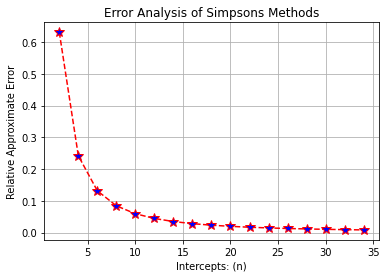

In [146]:
plt.Figure(figsize=(12, 8), facecolor='black', linewidth=2)
# plt.plot(n_value, errors, 'r-*', markercolor = 'b')
plt.plot(n_value, errors, color='red', linestyle='dashed', marker='*', markerfacecolor='blue', markersize=10)
plt.grid(axis = 'both')
plt.xlabel('Intercepts: (n)')
plt.ylabel('Relative Approximate Error')
plt.title('Error Analysis of Simpsons Methods')
plt.show()

In [147]:
errors

[0.631356429923222,
 0.242079815374769,
 0.131485444690829,
 0.0841631166271685,
 0.0592202126341196,
 0.0443124838602093,
 0.0346201040162793,
 0.0279263308977675,
 0.0230884774211774,
 0.0194657132842174,
 0.0166745323466701,
 0.0144732534497745,
 0.0127030200814466,
 0.0112556958109276,
 0.0100554608004628,
 0.00904779074371625,
 0.00819260630039831]